In [1]:
import librosa
import psola
import numpy as np
from scipy.io import wavfile
from IPython.display import display,Audio
import matplotlib.pyplot as plt

In [29]:
sample_rate, audio = wavfile.read("sarigamapa.wav")
audio = (audio.T).astype('float')
print(audio.shape)

(751464,)


C:\Users\indiw\AppData\Local\Temp\ipykernel_4568\906525781.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio = wavfile.read("sarigamapa.wav")


In [38]:
def pitch_estimate(y, sample_rate):
    frame_length = int(sample_rate/2)
    hop_length = int(frame_length/4)
    fmin = 100
    fmax = 10000
    
    f0, _, _ = librosa.pyin(y, 
                           frame_length = frame_length,
                           hop_length = hop_length,
                           sr = sample_rate,
                           fmin = fmin,
                           fmax = fmax)
    return f0
def pitch_shift(y, sample_rate, f0, num_semitones):
    corrected_f0 = f0*2*(num_semitones)
    fmin = 100
    fmax = 10000
    return psola.vocode(y, sample_rate=int(sample_rate), target_pitch=corrected_f0, fmin=fmin, fmax=fmax)

In [39]:
print(librosa.note_to_hz('C8'))
print(librosa.note_to_hz('C4'))

4186.009044809578
261.6255653005986


In [40]:
audio.dtype

dtype('float64')

(751464,)


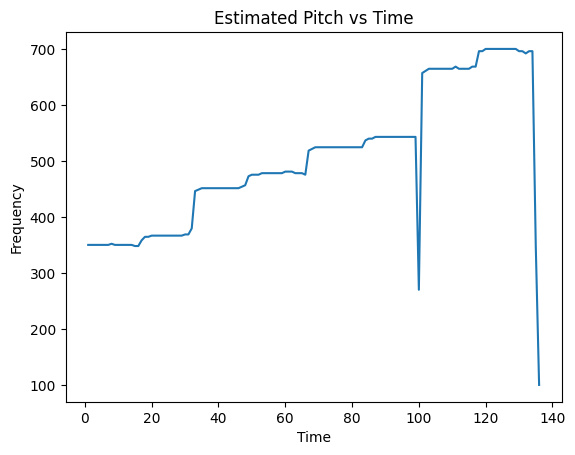

In [41]:
input_array = audio
print(input_array.shape)
f0 = pitch_estimate(input_array, sample_rate)
plt.plot(f0)
plt.title('Estimated Pitch vs Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [44]:
y = pitch_shift(input_array, sample_rate, f0, -2)

In [45]:
print('Original audio')
display(Audio(data=input_array,rate=sample_rate))
print('Synth audio')
Audio(data=y,rate=sample_rate)

Original audio


Synth audio


In [ ]:
duration = 5  # seconds
sample_rating = int(sample_rate)


# Normalize the audio signal to the range [-32768, 32767] for 16-bit WAV format
#normalized_signal = (audio_signal * 32767).astype(np.int16)

# Specify the output WAV file path
output_file = "pitch_up_psola_song.wav"

# Write the WAV file
write(output_file, sample_rating, y)